In [42]:
import pandas as pd
from pathlib import Path
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:


from typing import List, Dict


class ProcessData:

       def __init__(self, *args, **kwargs):
              self.data_folder_address = Path("__file__").parent / "data" or kwargs.get("data_folder_address")
              self.keep_cols = kwargs.get("keep_cols")

       @property
       def data_file_list(self):
              _list = [file for file in os.listdir(self.data_folder_address)]
              return _list

       def read_data(self, file_name):
              address = self.data_folder_address / file_name
              df = pd.read_csv(address, encoding= 'unicode_escape')
              return df

       def rename_columns(self, df):

              column_list = df.columns.tolist()
              first_row = df.iloc[0].tolist()
              new_column_list = [str(i) + "_" + str(j) for i, j in zip(column_list, first_row)]
              df = df.drop([0])
              df.columns = new_column_list
              return df

       def make_float(self, df, except_cols:List[str] = None):
              if not except_cols:
                     df = df.astype(float)
                     return df
              for col in df.columns:
                  if col not in except_cols:
                         df[col] = df[col].astype(float)
              return df

       def keep_columns(self, df, keep_cols=None):
              if keep_cols:
                     df = df[keep_cols]
                     return df
              else:
                     keep_cols = [
                     'Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
                            'Shear Rate_(1/s)','Shear Stress_(dyne/cm²)',
                            'Viscosity_(cP)','Bob Deflection_(deg.)',
                            'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)'
                     ]
                     df = df[keep_cols]
                     return df

       def plot_heatmap(self, df, title='Correlation Heatmap', figzie=(10,8)):
              plt.figure(figsize=figzie)
              sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
              # add title
              plt.title(title, fontsize=20)
              plt.show()

       def plot_pairplot(self, df):
              plt.figure(figsize=(10,8))
              sns.pairplot(df, height=2)
              plt.show()

       def print_corr_with_resp(self, df, resp_col="Viscosity_(cP)"):
              corr  = df.corr()[resp_col].sort_values(ascending=False)
              print(corr)

       def concate_data(self, dataframes:Dict[str, pd.DataFrame] = None) -> pd.DataFrame:

              dataframe_list = []
              for key, df in dataframes.items():
                     df["dataframe_name"] = key
                     # check if there is -P in the key then make a new column called condition and paste 'P constant' for all rows, else 'Temprature constant'

                     if "-P" in key:
                            df["condition"] = "Pressure constant"
                     else:
                            df["condition"] = "Temprature constant"

                     dataframe_list.append(df)

              # concatenate all dataframes
              df = pd.concat(dataframe_list, ignore_index=True)
              return df



In [44]:
# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("opybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# obj.plot_heatmap(df, title="OPyBr-cons-T")
# # obj.plot_pairplot(df)
# obj.print_corr_with_resp(df)

# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("hpybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# obj.plot_heatmap(df, title="HPyBr-cons-T")
# # obj.plot_pairplot(df)
# obj.print_corr_with_resp(df)


# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("hpybr-AA-cons-T.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# df1 = df
#
# obj = ProcessData()
# # obj.data_file_list
# df = obj.read_data("opybr-AA-cons-P.csv")
# df = obj.rename_columns(df)
# df = obj.make_float(df)
# df = obj.keep_columns(df)
# df2 = df

In [45]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
       'hpybr-AA-cons-T.csv',
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]

dataframes = {}
for file in list_of_files:
       obj = ProcessData()
       # obj.data_file_list
       df = obj.read_data(file)
       df = obj.rename_columns(df)
       # df = obj.make_float(df)
       df = obj.keep_columns(df)
       df = obj.make_float(df)
       dataframes[file] = df


In [46]:
dataframes.get("hpybr-AA-cons-T.csv").info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2913 entries, 1 to 2913
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample Temp_(°F)         2913 non-null   float64
 1   Pressure_(PSIg)          2913 non-null   float64
 2   Rotor Speed_(RPM)        2913 non-null   float64
 3   Shear Rate_(1/s)         2913 non-null   float64
 4   Shear Stress_(dyne/cm²)  2913 non-null   float64
 5   Viscosity_(cP)           2913 non-null   float64
 6   Bob Deflection_(deg.)    2913 non-null   float64
 7   Torque_(dyne-cm)         2913 non-null   float64
 8   Raw Encoder Value_(cts)  2913 non-null   float64
dtypes: float64(9)
memory usage: 227.6 KB


In [47]:
final_df = obj.concate_data(dataframes)

In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17509 entries, 0 to 17508
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sample Temp_(°F)         17509 non-null  float64
 1   Pressure_(PSIg)          17509 non-null  float64
 2   Rotor Speed_(RPM)        17509 non-null  float64
 3   Shear Rate_(1/s)         17509 non-null  float64
 4   Shear Stress_(dyne/cm²)  17509 non-null  float64
 5   Viscosity_(cP)           17509 non-null  float64
 6   Bob Deflection_(deg.)    17509 non-null  float64
 7   Torque_(dyne-cm)         17509 non-null  float64
 8   Raw Encoder Value_(cts)  17509 non-null  float64
 9   dataframe_name           17509 non-null  object 
 10  condition                17509 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.5+ MB


In [49]:
final_df.columns

Index(['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
       'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
       'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)',
       'dataframe_name', 'condition'],
      dtype='object')

In [50]:
final_df["condition"].unique()

array(['Pressure constant', 'Temprature constant'], dtype=object)

In [51]:
list_of_files = [
       'hpybf4-AA-cons-P-2.csv',
       # 'hpybf4-AA-cons-P.csv',
       'hpybf4-AA-cons-T.csv',
       'hpybr-AA-cons-T.csv',
       # 'opybr-AA-cons-P-2.csv',
       'opybr-AA-cons-P.csv',
       'opybr-AA-cons-T.csv'
]
list_of_files

['hpybf4-AA-cons-P-2.csv',
 'hpybf4-AA-cons-T.csv',
 'hpybr-AA-cons-T.csv',
 'opybr-AA-cons-P.csv',
 'opybr-AA-cons-T.csv']

In [52]:
sub_hpybf4_p_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-P-2.csv"
sub_hpybf4_t_mask = final_df["dataframe_name"] == "hpybf4-AA-cons-T.csv"
sub_hpybr_t_mask = final_df["dataframe_name"] == "hpybr-AA-cons-T.csv"
sub_opybr_p_mask = final_df["dataframe_name"] == "opybr-AA-cons-P.csv"
sub_opybr_t_mask = final_df["dataframe_name"] == "opybr-AA-cons-T.csv"

In [53]:
final_df.groupby("dataframe_name")["Viscosity_(cP)"].describe().T

dataframe_name,hpybf4-AA-cons-P-2.csv,hpybf4-AA-cons-T.csv,hpybr-AA-cons-T.csv,opybr-AA-cons-P.csv,opybr-AA-cons-T.csv
count,4952.000000,1784.000000,2913.000000,4962.000000,2898.000000
mean,42.523852,1.964814,2.869774,82.944963,225.691124
std,68.111610,0.858213,0.989553,100.622193,195.524456
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.215100,1.024300,2.048700,19.451900,177.685200
50%,11.262800,2.048100,3.072600,23.547300,195.260800
75%,31.740200,3.072000,3.072600,98.917300,209.959900
max,464.500100,4.096300,6.145200,514.516600,1523.266000


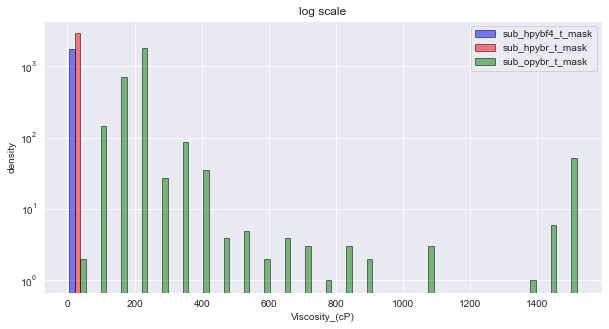

In [54]:
plt.figure(figsize=(10,5))

plt.hist([final_df[sub_hpybf4_t_mask]['Viscosity_(cP)'],
         final_df[sub_hpybr_t_mask]['Viscosity_(cP)'],
         final_df[sub_opybr_t_mask]['Viscosity_(cP)']],
         ec='k', alpha=0.5, bins=25,  color=('b','r', 'g'),
         label=['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'],
         log=True)

plt.xlabel('Viscosity_(cP)');
plt.ylabel('density')
plt.legend(loc='upper right'), plt.title('log scale')
plt.legend(['sub_hpybf4_t_mask', 'sub_hpybr_t_mask', 'sub_opybr_t_mask'])

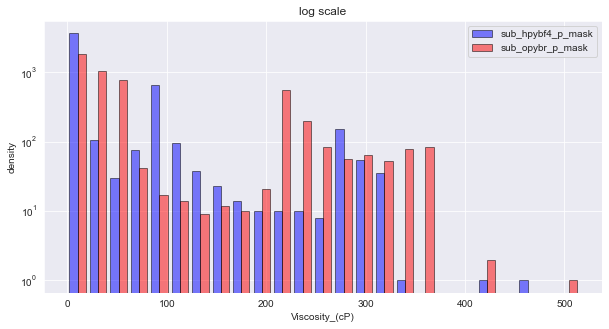

In [55]:
plt.figure(figsize=(10,5))

plt.hist([final_df[sub_hpybf4_p_mask]['Viscosity_(cP)'],
         final_df[sub_opybr_p_mask]['Viscosity_(cP)']],
         ec='k', alpha=0.5, bins=25,  color=('b','r'),
         label=['sub_hpybf4_p_mask', 'sub_opybr_p_mask'],
         log=True)

plt.xlabel('Viscosity_(cP)')
plt.ylabel('density')
plt.legend(loc='upper right'), plt.title('log scale')
plt.legend(['sub_hpybf4_p_mask', 'sub_opybr_p_mask'])

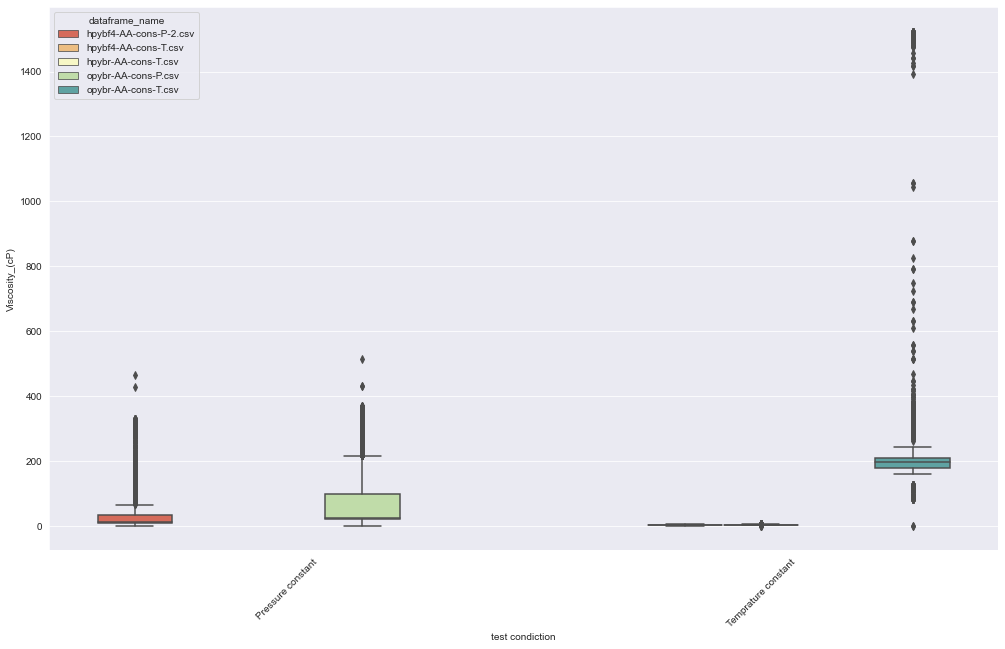

In [61]:
col1 = 'condition'
col2_numer = 'Viscosity_(cP)'

plt.figure(figsize=(17,10))

ax = sns.boxplot(x=col1, y=col2_numer, data=final_df, palette="Spectral",
                 hue=final_df['dataframe_name'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

# ax = sns.swarmplot(x=col1, y=col2_numer, data=final_df, color='#7d0013')
#make y axis log scale
# plt.yscale('log')
plt.xlabel('test condiction')
plt.show()

In [62]:
final_df.groupby("dataframe_name")["Viscosity_(cP)"].describe().T

dataframe_name,hpybf4-AA-cons-P-2.csv,hpybf4-AA-cons-T.csv,hpybr-AA-cons-T.csv,opybr-AA-cons-P.csv,opybr-AA-cons-T.csv
count,4952.000000,1784.000000,2913.000000,4962.000000,2898.000000
mean,42.523852,1.964814,2.869774,82.944963,225.691124
std,68.111610,0.858213,0.989553,100.622193,195.524456
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.215100,1.024300,2.048700,19.451900,177.685200
50%,11.262800,2.048100,3.072600,23.547300,195.260800
75%,31.740200,3.072000,3.072600,98.917300,209.959900
max,464.500100,4.096300,6.145200,514.516600,1523.266000


In [70]:
# set plot dpi to 300
plt.figure(figsize=(17,10), dpi=300)

<Figure size 5100x3000 with 0 Axes>

<Figure size 5100x3000 with 0 Axes>

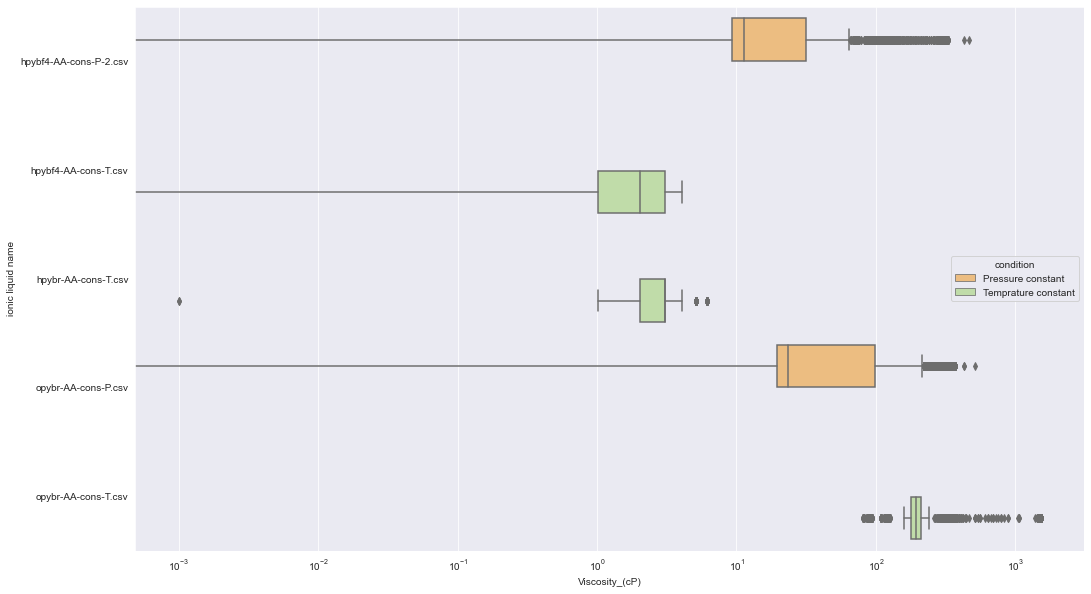

In [72]:
plt.figure(figsize=(17,10))

ax = sns.boxplot(y=final_df['dataframe_name'],
                 x=final_df['Viscosity_(cP)'],
                 data=final_df,
                 palette="Spectral",
                 hue=final_df['condition'])
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
# make x axis log scale
plt.xscale('log')
plt.xlabel('Viscosity_(cP)')
plt.ylabel('ionic liquid name')
plt.show()

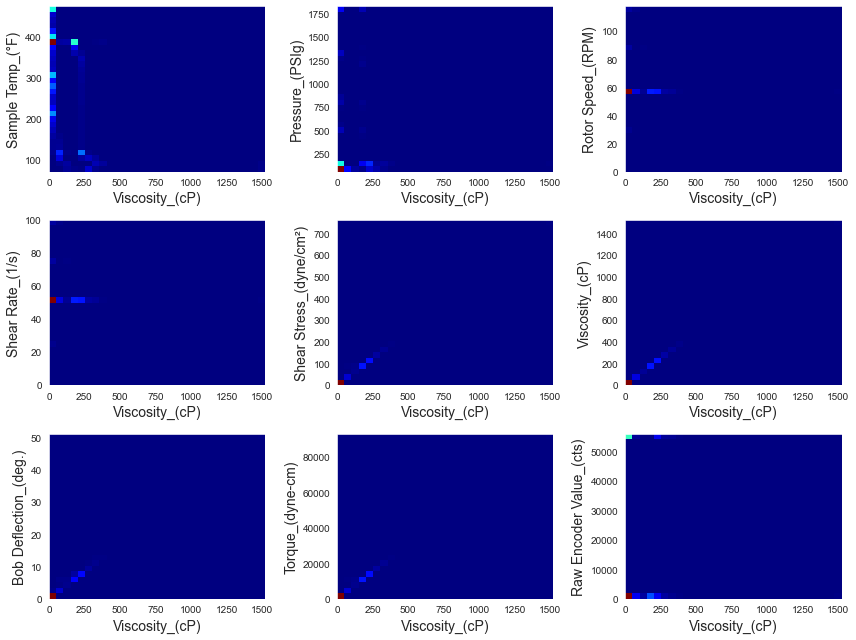

In [77]:
col1 = ['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
       'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
       'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)']

y_col_name = ['Sample Temp_(°F)', 'Pressure_(PSIg)', 'Rotor Speed_(RPM)',
       'Shear Rate_(1/s)', 'Shear Stress_(dyne/cm²)', 'Viscosity_(cP)',
       'Bob Deflection_(deg.)', 'Torque_(dyne-cm)', 'Raw Encoder Value_(cts)']



plt.figure(figsize=(12,9))
for i, col in enumerate(col1):

    plt.subplot(3,3,i+1)

    plt.hist2d(final_df['Viscosity_(cP)'],
               final_df[col],
               cmap=plt.cm.jet,
               bins=(30, 30))
    plt.xlabel('Viscosity_(cP)', fontsize=14)
    plt.ylabel(y_col_name[i], fontsize=14)
plt.tight_layout()
# plt.savefig('../Figures/P02_stat_EDA.png')
plt.show()

/Users/amin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


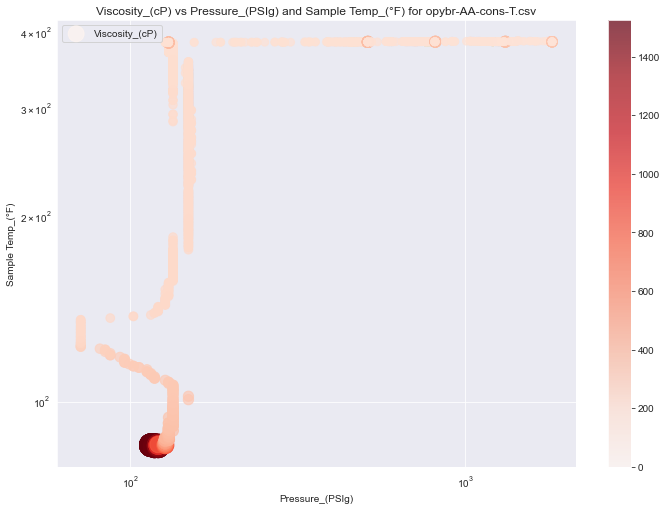

In [89]:
ax = plt.gca()
selected_df = final_df[final_df['dataframe_name'] == 'opybr-AA-cons-T.csv']
selected_df.plot(kind="scatter", x="Pressure_(PSIg)",
        y='Sample Temp_(°F)',
        s=selected_df['Viscosity_(cP)']/3,
        c=selected_df['Viscosity_(cP)'],
        label="Viscosity_(cP)",
        colorbar=True,
        grid=True,
        cmap='Reds',
        alpha=0.7,
        figsize=(10,7),
        ax = ax
)
# plt.legend()
# make both axis log scale
plt.xscale('log')
plt.yscale('log')
# grid on
plt.grid(True)
plt.tight_layout()
# add title
plt.title('Viscosity_(cP) vs Pressure_(PSIg) and Sample Temp_(°F) for opybr-AA-cons-T.csv')
plt.show()

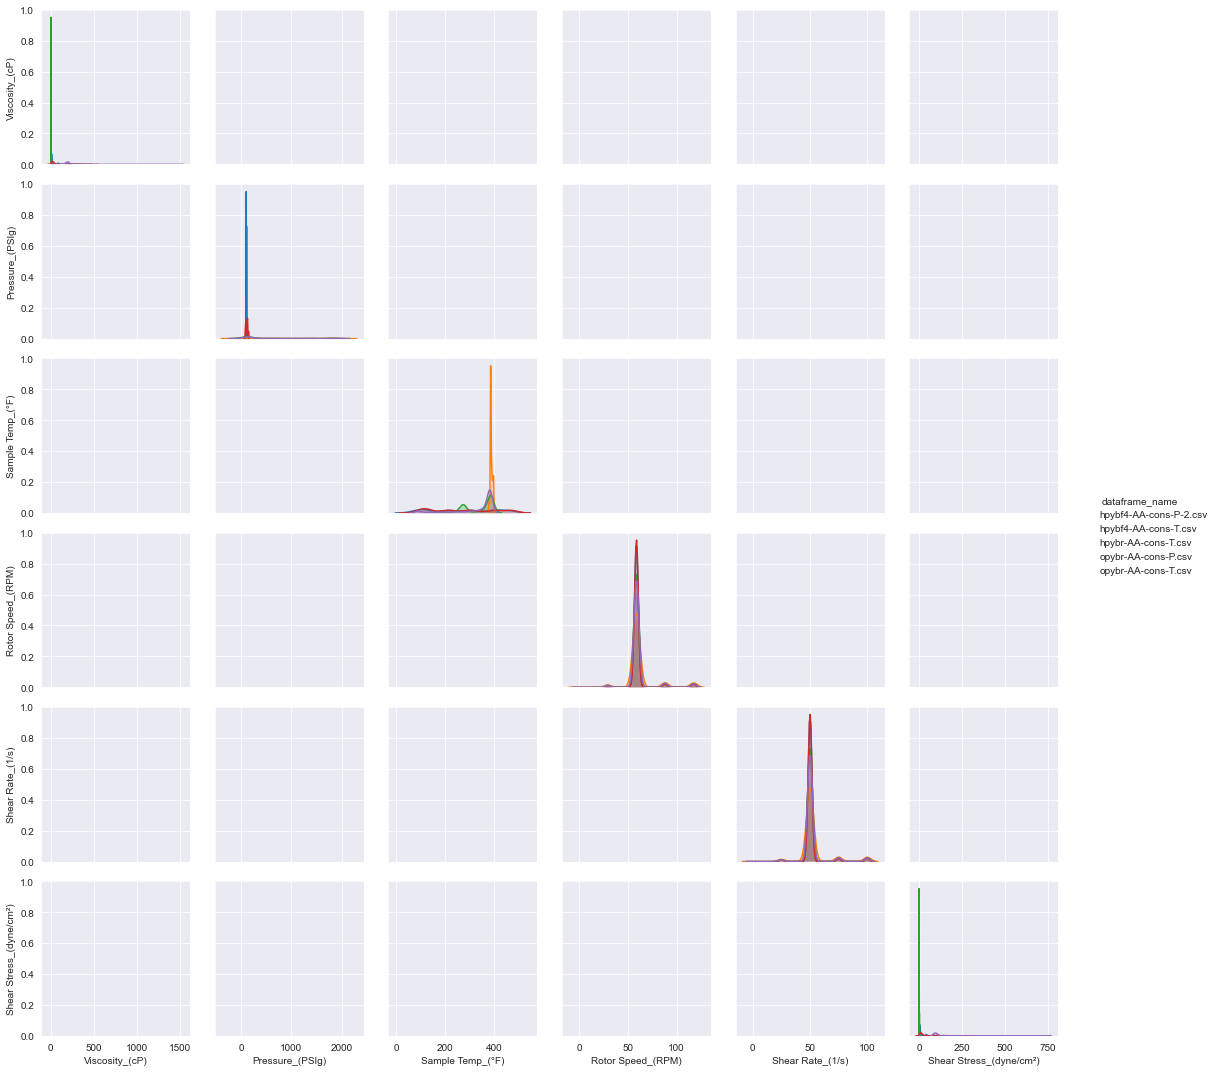

In [96]:

keep_cols = ['dataframe_name', 'Viscosity_(cP)', 'Pressure_(PSIg)',
       'Sample Temp_(°F)', 'Rotor Speed_(RPM)', 'Shear Rate_(1/s)',
       'Shear Stress_(dyne/cm²)']
selected_df = final_df[keep_cols]

import seaborn as sns
# sns.set_theme(style="ticks")

sns.pairplot(selected_df, hue="dataframe_name", kind="hist")

In [102]:
# import seaborn as sns
#
# # sns.set_theme(style="darkgrid")
# sns.histplot(
#     final_df, x="Viscosity_(cP)", col="dataframe_name", row="condition",
#     binwidth=3, height=3, facet_kws=dict(margin_titles=True),
# )


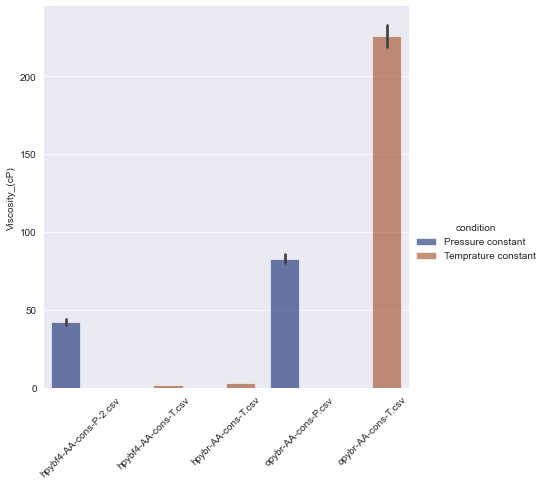

In [108]:
import seaborn as sns
# sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_df, kind="bar",
    x="dataframe_name", y="Viscosity_(cP)", hue="condition",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Viscosity_(cP)")
# tilt x label 45 degree
g.set_xticklabels(rotation=45)
# g.legend.set_title("")

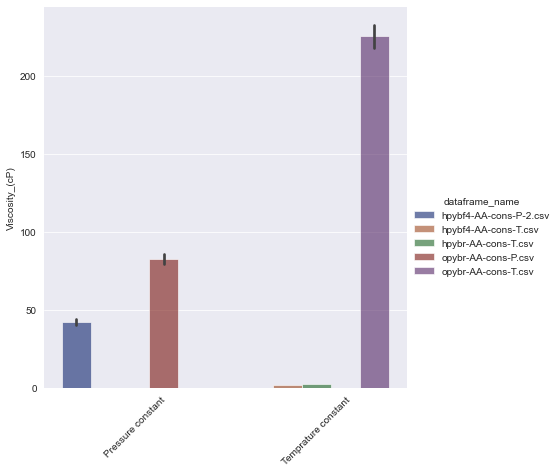

In [109]:
import seaborn as sns
# sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=final_df, kind="bar",
    x="condition", y="Viscosity_(cP)", hue="dataframe_name",
     palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Viscosity_(cP)")
# tilt x label 45 degree
g.set_xticklabels(rotation=45)
# g.legend.set_title("")

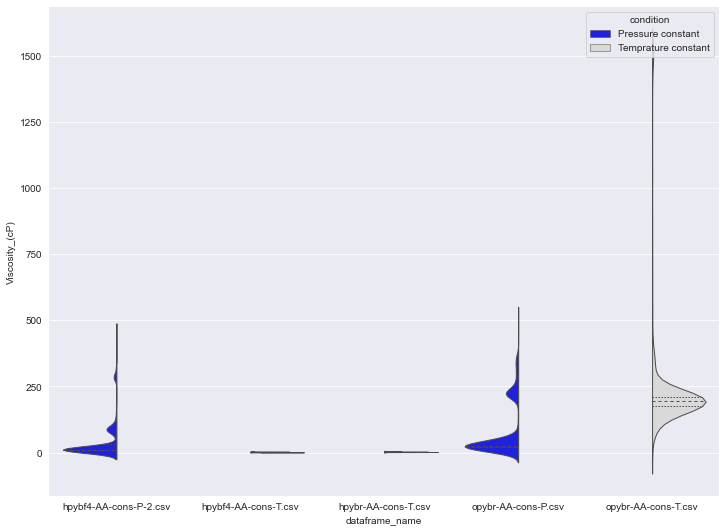

In [113]:
import seaborn as sns
# sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,9))
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(data=final_df, x="dataframe_name", y="Viscosity_(cP)", hue="condition",
               split=True, inner="quart", linewidth=1,
               palette={"Pressure constant": "b", "Temprature constant": ".85"})
g.set_xticklabels(rotation=45)

sns.despine(left=True)